In [1]:
source_folder="../data-amaltea/binary/"

#ini_date = '04/01/23 12:00:00'
#end_date = '06/01/23 13:00:00'
#target_folder="./time-data/evaluation/"

#setup: 20/12/2022 a las 15:00 a. m. hasta el 23/12/2022 a las 15:00 a. m.
#config: 04/01/2023 a las 12:00 a. m. hasta el 06/01/2023 a las 12:00 a. m.

ini_date = '20/12/22 15:00:00'
end_date = '23/12/22 15:00:00'
target_folder="./time-data/setup/"
time_step=15


#binary_sensors=["cubiertos"]

binary_sensors=["presence_vitro2"]


In [2]:
import numpy as np
from pandas import read_csv    

import time

from datetime import datetime

def day_time(ti):
    return int((int)(ti/(60*60*24)))



t0 = (int)(datetime.strptime(ini_date, '%d/%m/%y %H:%M:%S').timestamp())
print (ini_date,"Init date is", t0, "day:",day_time(t0))

tN = (int)(datetime.strptime(end_date, '%d/%m/%y %H:%M:%S').timestamp())
print (end_date,"End date is", tN, "day:",day_time(tN))

def relT(ti):
    return (int)((ti-t0)/time_step)


20/12/22 15:00:00 Init date is 1671544800 day: 19346
23/12/22 15:00:00 End date is 1671804000 day: 19349


In [3]:
import pandas as pd

df = pd.DataFrame()

ts=[]
for t in range(t0,tN,time_step):
    ts.append(datetime.fromtimestamp( t))

df['Time']=ts    
    

In [4]:

for sensor in binary_sensors:
    lastV=-1
    dt=[]
    cS=0
    for d in range(day_time(t0),day_time(tN)+1):
        print("Loading day ",d)
        try:
            series=read_csv(source_folder+str(d)+"."+sensor+".tsv", sep="\t",parse_dates=True,header=None)
            for vt in series.values[:,[0,2]]:
                cS=cS+1
                print('vt[1]',vt[1])
                if('on'== vt[1]):
                    dt.append([relT(vt[0]),1])
                else:
                    #print("ignoring ",vt[0])
                    dt.append([relT(vt[0]),0])
                lastV=vt[1]
        except:
            print(" Not data for sensor ",sensor, " in day ",d)
    
    print("#Sensor:",sensor, " #:",cS,dt)
    dt=np.array(dt)
    #print(dt.shape)
    #print(dt)
    ts=dt[:,0]
    f = open(target_folder+sensor+".tsv", "w")
    vs=[]
    cS=0
    for t in range(t0,tN,time_step):
        ti=relT(t)
        print("ti:",ti,datetime.fromtimestamp( t).strftime("%Y-%m-%d %H:%M:%S"))
        i=np.where( (ts<=ti))[0]
        print(i)
        if(len(i)!=0 and dt[i[-1]][1]==1):
            cS=cS+1
            vs.append(1)
            f.write(str(ti)+"\t1\t"+datetime.fromtimestamp( t).strftime("%Y-%m-%d %H:%M:%S")+"\n")
        else:
            vs.append(0)
            f.write(str(ti)+"\t0\t"+datetime.fromtimestamp( t).strftime("%Y-%m-%d %H:%M:%S")+"\n")
    f.close()
    df[sensor]=vs
    print("#Sensor:",sensor, " #:",cS)


        

Loading day  19346
vt[1] off
vt[1] on
vt[1] off
vt[1] on
vt[1] off
vt[1] on
vt[1] off
vt[1] on
vt[1] off
vt[1] on
vt[1] off
vt[1] on
vt[1] off
vt[1] on
vt[1] off
vt[1] on
vt[1] off
vt[1] on
vt[1] off
vt[1] on
vt[1] off
vt[1] on
vt[1] off
vt[1] on
vt[1] off
vt[1] on
vt[1] off
Loading day  19347
vt[1] on
vt[1] off
vt[1] on
vt[1] off
vt[1] on
vt[1] off
vt[1] on
vt[1] off
vt[1] on
vt[1] off
vt[1] on
vt[1] off
vt[1] on
vt[1] off
vt[1] on
vt[1] off
vt[1] on
vt[1] off
vt[1] on
vt[1] off
vt[1] on
vt[1] off
vt[1] on
vt[1] off
vt[1] on
vt[1] off
vt[1] on
vt[1] off
vt[1] on
vt[1] off
vt[1] on
vt[1] off
vt[1] on
vt[1] off
vt[1] on
vt[1] off
vt[1] on
vt[1] off
vt[1] on
vt[1] off
vt[1] on
vt[1] off
vt[1] on
vt[1] off
vt[1] on
vt[1] off
vt[1] on
vt[1] off
vt[1] on
vt[1] off
vt[1] on
vt[1] off
vt[1] on
vt[1] off
vt[1] on
vt[1] off
vt[1] on
vt[1] off
vt[1] on
vt[1] off
vt[1] on
vt[1] off
vt[1] on
vt[1] off
vt[1] on
vt[1] off
vt[1] on
vt[1] off
vt[1] on
vt[1] off
vt[1] off
vt[1] on
vt[1] off
vt[1] on
vt

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26]
ti: 2629 2022-12-21 01:57:15
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26]
ti: 2630 2022-12-21 01:57:30
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26]
ti: 2631 2022-12-21 01:57:45
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26]
ti: 2632 2022-12-21 01:58:00
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26]
ti: 2633 2022-12-21 01:58:15
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26]
ti: 2634 2022-12-21 01:58:30
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26]
ti: 2635 2022-12-21 01:58:45
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26]
ti: 2636 2022-12-21 01:59:00
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26]
ti: 2637 202

ti: 5589 2022-12-21 14:17:15
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90]
ti: 5590 2022-12-21 14:17:30
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90]
ti: 5591 2022-12-21 14:17:45
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90]
ti: 5592 2022-12-21 14:18:00
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 1

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94]
ti: 5774 2022-12-21 15:03:30
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94]
ti: 5775 2022-12-21 15:03:45
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94]
ti: 5776 2022-12-21 15:04:00
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 

  90  91  92  93  94  95  96  97  98  99 100 101]
ti: 7333 2022-12-21 21:33:15
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101]
ti: 7334 2022-12-21 21:33:30
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101]
ti: 7335 2022-12-21 21:33:45
[  0   1   2   3   4   5   6   7 

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101]
ti: 7409 2022-12-21 21:52:15
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101]
ti: 7410 2022-12-21 21:52:30
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  2

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101]
ti: 8960 2022-12-22 04:20:00
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101]
ti: 8961 2022-12-22 04:20:15
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  2

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103]
ti: 9912 2022-12-22 08:18:00
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103]
ti: 9913 2022-12-22 08:18:15
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  2

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



array([<AxesSubplot:xlabel='Time'>], dtype=object)

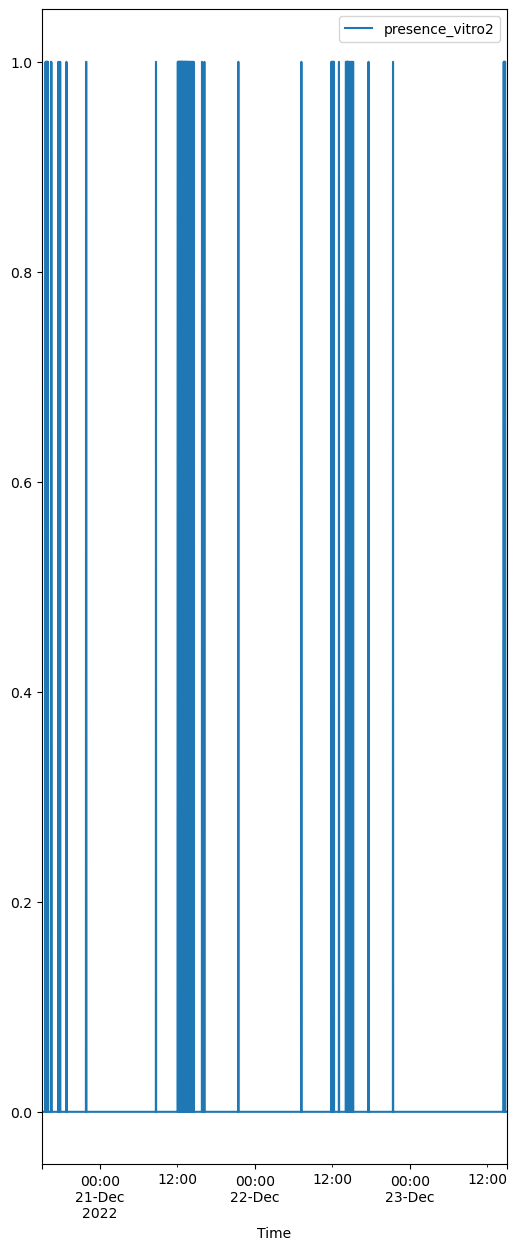

In [5]:
df.plot(x="Time",y=binary_sensors,subplots=True, legend=True, figsize=(6,15))
